In [6]:
import pynance as pn
import matplotlib 
import pandas 
import datetime

In [7]:
pip install pynance

Note: you may need to restart the kernel to use updated packages.


In [8]:
nvidia_ = pn.data.get('NVDA', '2015', '2024')
AMD_ = pn.data.get('AMD', '2015', '2024')
apple_ = pn.data.get('AAPL', '2023', '2024')
intel_ = pn.data.get('INTC', '2015', '2024')
tsmc_ = pn.data.get('TSM', '2015', '2024')
asml_ = pn.data.get('ASML', '2015', '2024')
microsoft_ = pn.data.get('MSFT', '2015', '2024')
amazon_ = pn.data.get('AMZN', '2015', '2024')

apple_

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,192.743,193.240,190.581,191.382,42928346
2023-12-28,192.981,193.499,192.018,192.424,34254329
2023-12-27,191.342,192.345,189.949,191.998,48376393
2023-12-26,192.454,192.733,191.679,191.898,29092938
2023-12-22,194.015,194.244,191.818,192.444,37372611
...,...,...,...,...,...
2023-01-09,128.965,131.878,128.397,128.654,71613893
2023-01-06,124.562,128.792,123.455,128.130,88775033
2023-01-05,125.669,126.301,123.326,123.584,81904056


In [9]:
sum(range(1,11))

55

In [10]:
nvidia_['Close']

Date
2023-12-29    49.508000
2023-12-28    49.508000
2023-12-27    49.403000
2023-12-26    49.265100
2023-12-22    48.816100
                ...    
2015-01-08     0.476689
2015-01-07     0.459303
2015-01-06     0.460533
2015-01-05     0.474980
2015-01-02     0.483159
Name: Close, Length: 2264, dtype: float64

In [11]:
index = []

for i in range(0,2264):
    index.append(i)

nvidia = nvidia_.assign(index=index)

nvidia_.to_csv(path_or_buf='./data/nvidia.csv')
AMD_.to_csv(path_or_buf='./data/amd.csv')
apple_.to_csv(path_or_buf='./data/apple.csv')
intel_.to_csv(path_or_buf='./data/intel.csv')
tsmc_.to_csv(path_or_buf='./data/tsmc.csv')
asml_.to_csv(path_or_buf='./data/asml.csv')
microsoft_.to_csv(path_or_buf='./data/microsoft.csv')
amazon_.to_csv(path_or_buf='./data/amazing.csv')


# here I define an index since I can't get the value of 'date' this index can be used to get the date
# for example: index 0 == most recent date, index 2264 == furthest date

In [12]:
# function to calculate the date based on an index number

def index_calc(index):
    date_max = datetime.date(2023,12,29)

    delta = datetime.timedelta(days=index)

    new_DATE = date_max - delta

    return new_DATE

In [13]:

nvidia2 = pandas.read_csv('./data/nvidia.csv')
intel2 = pandas.read_csv('./data/intel.csv')
amd2 = pandas.read_csv('./data/amd.csv')
apple2 = pandas.read_csv('./data/apple.csv')
tsmc2 = pandas.read_csv('./data/tsmc.csv')
asml2 = pandas.read_csv('./data/asml.csv')
microsoft2 = pandas.read_csv('./data/microsoft.csv')
amazing2 = pandas.read_csv('./data/amazing.csv')

asml2['Date'][:10]


0    2023-12-29
1    2023-12-28
2    2023-12-27
3    2023-12-26
4    2023-12-22
5    2023-12-21
6    2023-12-20
7    2023-12-19
8    2023-12-18
9    2023-12-15
Name: Date, dtype: object

In [14]:
def find_date(date:str):
    x = 0
    for i in nvidia2['Date']:
        if i == date:
            return x
        x = x+1

In [15]:
find_date('2023-12-22')

4

finding news

In [16]:
import requests
import csv
import json

news = 0

def newsFromCNN(): 
    query_params = {
        "q":"nvidia",
        "apiKey":"71849c70a62846ffb1018c530ffb18eb",
        "sortBy":"publishedAt",
        "language":"en"
    }

    main_url = "https://newsapi.org/v2/everything?"

    responce = requests.get(main_url, params=query_params)
    cnn_page = responce.json()

    news = pandas.json_normalize(cnn_page["articles"],
                                 meta=['source', 'author', 'tittle', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

    return news


In [17]:
newsFromCNN()

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Jabin Bastian,Sportsman's Warehouse (NASDAQ:SPWH) Beats Expe...,Outdoor specialty retailer Sportsman's Warehou...,https://finance.yahoo.com/news/sportsmans-ware...,https://s.yimg.com/ny/api/res/1.2/Cg7wyeuh8j4e...,2025-04-01T20:15:37Z,Sportsman's Warehouse (NASDAQ:SPWH) Beats Expe...,None,Yahoo Entertainment
1,James Mickleboro,S&P 500 and Nasdaq post worst quarter since 20...,Let's find out whether now is the time to jump...,https://www.fool.com.au/?p=1779980,https://www.fool.com.au/wp-content/uploads/202...,2025-04-01T20:03:00Z,It certainly was a bruising quarter for Wall S...,None,Motley Fool Australia
2,"Max (Chong) Li, Contributor, \n Max (Chong) Li...",DeepSeek’s Child Prodigy Paradox: When Knowled...,"That was DeepSeek when we put it to the test, ...",https://www.forbes.com/sites/digital-assets/20...,https://imageio.forbes.com/specials-images/ima...,2025-04-01T19:58:58Z,Global tech stocks have plummeted following th...,None,Forbes
3,"Derek Saul, Forbes Staff, \n Derek Saul, Forbe...",Forbes Recession Tracker: Recession Odds Spike...,Economists are increasingly concerned Trump's ...,https://www.forbes.com/sites/dereksaul/2025/04...,https://imageio.forbes.com/specials-images/ima...,2025-04-01T19:57:32Z,Several economists warn the Trump administrati...,None,Forbes
4,Vinh Nguyen,LLM Benchmarking: Fundamental Concepts,The past few years have witnessed the rise in ...,https://developer.nvidia.com/blog/llm-benchmar...,https://developer-blogs.nvidia.com/wp-content/...,2025-04-01T19:55:02Z,The past few years have witnessed the rise in ...,None,Nvidia.com
...,...,...,...,...,...,...,...,...,...
95,Tanveer Singh,High-end gaming doesn't need high-end GPUs any...,Mid-range cards are now offering a high-end ga...,https://www.xda-developers.com/high-end-gaming...,https://static1.xdaimages.com/wordpress/wp-con...,2025-04-01T12:00:38Z,I'd be lying if I said I never wished to have ...,None,XDA Developers
96,Dashia Milden,70% of Gen Z and Millennial Gamers Are Ready t...,Gen Z gamers spend nearly $700 a year on new g...,https://www.cnet.com/tech/gaming/nintendo-swit...,https://www.cnet.com/a/img/resize/67e67c30f142...,2025-04-01T12:00:00Z,The time has finally come for a new Nintendo c...,None,CNET
97,investors.com,"Nvidia, Other Techs Hurt Dow Jones, But These ...","Since it joined the Dow industrials on Nov. 7,...",https://biztoc.com/x/a5e24545fd302de7,https://biztoc.com/cdn/928/og.png,2025-04-01T11:51:40Z,"Since it joined the Dow industrials on Nov. 7,...",None,Biztoc.com
98,Stefan Mileschin,AMD cosies up to Rapt AI to claw into Nvidias...,Underdog chipmaker AMD is teaming up with Rapt...,http://www.madshrimps.be/news/item/238136,None,2025-04-01T11:51:04Z,"Copyright © 2001-2011 Madshrimps, All rights r...",None,Madshrimps.be


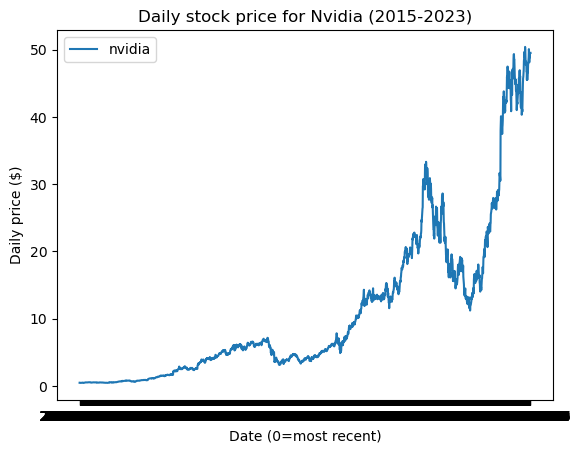

In [21]:
import matplotlib
import matplotlib.pyplot

date = nvidia2["Date"][::-1]
close = nvidia2['Close'][::-1]

matplotlib.pyplot.plot(date, close, label="nvidia")
# matplotlib.pyplot.plot(amd2['Date'], amd2['Close'], label="amd")
# matplotlib.pyplot.plot(apple2['Date'], apple2['Close'], label="apple")
# matplotlib.pyplot.plot(tsmc2['Date'][::-1], tsmc2['Close'][::-1], label="tsmc")
# matplotlib.pyplot.plot(asml2['Date'], asml2['Close'], label="asml")
# matplotlib.pyplot.plot(intel2['Date'], intel2['Close'], label="intel")
# matplotlib.pyplot.plot(microsoft2['Date'], microsoft2['Close'], label="microsoft")
# matplotlib.pyplot.plot(amazing2['Date'], amazing2['Close'], label="amazon")
matplotlib.pyplot.legend()

matplotlib.pyplot.ylabel('Daily price ($)')
matplotlib.pyplot.xlabel('Date (0=most recent)')
matplotlib.pyplot.title('Daily stock price for Nvidia (2015-2023)')

matplotlib.pyplot.savefig("output-347.jpg")

matplotlib.pyplot.show()


In [19]:
#save news data as csv

newsFromCNN().to_csv('data/news.csv')

In [20]:
# daily difference in closing price 
def diffs(DaTa):
    dif : list = []
    x=1
    for i in range(0,len(DaTa)): 
        o = (DaTa[x]*100/DaTa[i])-100
        
        x=x+1

        dif.append(o)

        if x >= 2263:
            x=x-1
    return dif

dif_Nvidia = diffs(nvidia2["Close"].to_list())
dif_amd = diffs(amd2["Close"].to_list())
dif_intel = diffs(intel2["Close"].to_list())
dif_tsmc = diffs(tsmc2["Close"].to_list())
dif_microsoft = diffs(microsoft2["Close"].to_list())
dif_amazon = diffs(amazing2["Close"].to_list())
dif_apple = diffs(apple2["Close"].to_list())
dif_asml = diffs(asml2["Close"].to_list())




IndexError: list index out of range

In [ ]:
def avg_dif(dif): 
    x =sum(dif)/len(dif)
    return x

avg_dif(dif_apple)

In [ ]:
date_list = date.to_list()

line = 0.3

matplotlib.pyplot.plot(date, dif_Nvidia, linewidth=line)
matplotlib.pyplot.plot(date, dif_apple, linewidth=line)
matplotlib.pyplot.plot(date, dif_amd, linewidth=line)
matplotlib.pyplot.plot(date, dif_intel, linewidth=line)
matplotlib.pyplot.plot(date, dif_amazon, linewidth=line)
matplotlib.pyplot.plot(date, dif_microsoft, linewidth=line)
matplotlib.pyplot.plot(date, dif_asml, linewidth=line)
matplotlib.pyplot.plot(date, dif_tsmc, linewidth=line)

matplotlib.pyplot.ylabel('Daily difference ($)')
matplotlib.pyplot.xlabel('Time(days)')
matplotlib.pyplot.title('Daily stock price difference (2015-2023)')

matplotlib.pyplot.savefig("output-343.jpg")

In [ ]:

matplotlib.pyplot.bar("Nvidia", avg_dif(dif_Nvidia))
matplotlib.pyplot.bar("Apple", avg_dif(dif_apple))
matplotlib.pyplot.bar("Amd", avg_dif(dif_amd))
matplotlib.pyplot.bar("Intel", avg_dif(dif_intel))
matplotlib.pyplot.bar("Amazon", avg_dif(dif_amazon))
matplotlib.pyplot.bar("Microsoft", avg_dif(dif_microsoft))
matplotlib.pyplot.bar("Asml", avg_dif(dif_asml))
matplotlib.pyplot.bar("Tsmc", avg_dif(dif_tsmc))

matplotlib.pyplot.ylabel('AVG difference ($)')
matplotlib.pyplot.xlabel('Company')
matplotlib.pyplot.title('AVG daily stock price difference (2015-2023)')

matplotlib.pyplot.savefig("output-344.jpg")

In [ ]:
import pandas as pd

data = {"Year": [2023,2022,2021,2020,2019,2018,2017,2016,2015],
        "Shares": [25070, 25350, 25100, 24720, 25000, 25280, 25960, 22760, 22520]
}

issued_shares_ = pd.DataFrame(data)

issued_shares = issued_shares_.values.tolist()

issued_shares

In [ ]:
# calculate the avg price per year

def avgYearPrice(ini : str, fini : str, lst : list): 

    v = int(fini) - int(ini)
    y = 0

    avgs = []
    c = 0
    
    for c in range(0,v+1): 
        p = []
        x = 0
        
        for i in lst['Date']: 
            if f"{int(ini)+y}" in i: 
                p.append(lst['Close'][x])
            x += 1
        
        avg = sum(p)/len(p)

        avgs.append(avg)

        y += 1
        c += 1
    return avgs

avgYearPrice("2015", "2023", nvidia2)

In [ ]:
p = []
x = 0
        
for i in nvidia2['Date']: 
    if "2015" in i: 
        p.append(nvidia2['Close'][x])
    x += 1
        
avg = sum(p)/len(p)

avg, sum(p), len(p), p

In [ ]:
prices = avgYearPrice("2015", "2023", nvidia2)
prices

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

shares_issued = [25070, 25350, 25100, 24720, 25000, 25280, 25960, 22760, 22520]

x = avgYearPrice("2015", "2023", nvidia2)
y = shares_issued

# plt.scatter(x, y, label="Nvidia")

#line of best fit
yLog = np.log(y)

m = np.polyfit(x, yLog, 1)

yExp = np.exp(1.98409040e+01) * np.exp(2.32544074e-03 * x)

plt.plot(x, yExp, label="fit", color="red")

plt.title("Exponential best fit line for Nvidia's supply curve")

plt.ylabel("Price")
plt.xlabel("Quantity")

matplotlib.pyplot.savefig("output-345.jpg")


In [ ]:

prices = np.array([49.5,14.6,29.3])
shares_issued = np.array([25070, 25350, 25100])

x = shares_issued
y = prices

plt.scatter(x, y, label="Nvidia", s=4)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)

plt.title("daily Close price compared to Volume")

plt.ylabel("Price")
plt.xlabel("Quantity")

# matplotlib.pyplot.savefig("output-346.jpg")

plt.show()

In [ ]:
import numpy as np

x = nvidia2["Volume"][:356]
y = nvidia2["Close"][:356]

plt.scatter(x, y, label="Nvidia", s=4)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)

plt.title("PED")

plt.ylabel("Price")
plt.xlabel("Quantity")

matplotlib.pyplot.savefig("output-346.jpg")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.axvspan(1.25, 1.26, facecolor='g', alpha=0.5)